In [26]:
import pandas as pd
import numpy as np
from pandas_datareader import data

pd.set_option('max_rows',10000)

In [2]:
def load_financial_data(start_date, end_date,output_file):
    try:
        df = pd.read_pickle(output_file)
        print('File data found...reading GOOG data')
    except FileNotFoundError:
        print('File not found...downloading the GOOG data')
        df = data.DataReader('GOOG', 'yahoo', start_date,end_date)
        df.to_pickle(output_file)
    return df

In [3]:
goog_data=load_financial_data(start_date='2001-01-01',
 end_date = '2018-01-01',
 output_file='goog_data_large.pkl')

File not found...downloading the GOOG data


In [4]:
goog_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086
...,...,...,...,...,...,...
2017-12-22,1064.199951,1059.439941,1061.109985,1060.119995,755100.0,1060.119995
2017-12-26,1060.119995,1050.199951,1058.069946,1056.739990,760600.0,1056.739990
2017-12-27,1058.369995,1048.050049,1057.390015,1049.369995,1271900.0,1049.369995


We will create a
double_moving_average function with parameters fixing the size of the two moving averages returning a data frame:
1. short_mavg: Short-term moving average values 
2. long_mavg: Long-term moving average values 
3. signal: True if the short-term moving average is higher than the long-term moving average 
4. orders: 1 for the buy order, and -1 for the sell order

In [20]:
def double_moving_average(financial_data, short_window, long_window):
    signals = pd.DataFrame(index=financial_data.index)
    signals["signal"] = 0.0
    
    signals["short_mavg"] = financial_data["Close"].rolling(window=short_window,min_periods=1,center=False).mean()
    signals["long_mavg"] = financial_data["Close"].rolling(window=long_window,min_periods=1,center=False).mean()
    
    signals["signal"] = np.where(signals["short_mavg"] > signals["long_mavg"],1.0,0.0)
    
    signals["orders"] = signals['signal'].diff()
    return signals

In [21]:
ts = double_moving_average(goog_data,20,100)

In [27]:
ts

,signal,short_mavg,long_mavg,orders
Date,,,,
2004-08-19,0.0,49.982655,49.982655,NaN
2004-08-20,0.0,51.967712,51.967712,0.0
2004-08-23,0.0,52.810387,52.810387,0.0
2004-08-24,0.0,52.667589,52.667589,0.0
2004-08-25,0.0,52.694489,52.694489,0.0
2004-08-26,0.0,52.870993,52.870993,0.0
2004-08-27,0.0,52.871823,52.871823,0.0
2004-08-30,0.0,52.614662,52.614662,0.0
2004-08-31,0.0,52.434573,52.434573,0.0


In [19]:
ts.orders.unique()

array([nan,  0.,  2., -2.])

In [14]:
import matplotlib.pyplot as plt

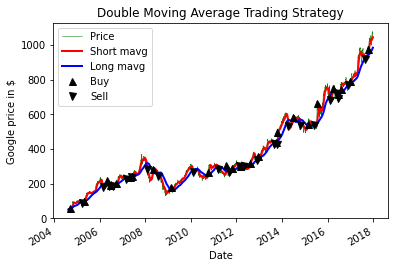

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
goog_data["Adj Close"].plot(ax=ax1, color='g', lw=.5)
ts["short_mavg"].plot(ax=ax1, color='r', lw=2.)
ts["long_mavg"].plot(ax=ax1, color='b', lw=2.)
ax1.plot(ts.loc[ts.orders== 1.0].index,
goog_data["Adj Close"][ts.orders == 1.0],'^', markersize=7, color='k')
ax1.plot(ts.loc[ts.orders== -1.0].index,
goog_data["Adj Close"][ts.orders == -1.0],'v', markersize=7, color='k')
plt.legend(["Price","Short mavg","Long mavg","Buy","Sell"])
plt.title("Double Moving Average Trading Strategy")
plt.show()